In [ ]:
! mkdir -p ~/.kaggle/ && cp '/content/drive/MyDrive/Leukemia_detection/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~ /content/drive/MyDrive/Leukemia_detection/kaggle.json
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Leukemia_detection"

In [ ]:
! kaggle datasets download -d andrewmvd/leukemia-classification

100% 865M/867M [00:08<00:00, 89.5MB/s]
100% 867M/867M [00:08<00:00, 101MB/s] 


In [ ]:
!ls

drive  leukemia-classification.zip  sample_data


In [ ]:
%cd /content/drive/MyDrive/Leukemia_detection

In [ ]:
!unzip /content/drive/MyDrive/Leukemia_detection/leukemia-classification.zip

# **Importation des packages**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import cv2
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.image import imread
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
import random
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Chargement des données**

In [ ]:
# Créer les dossiers Leukemia et Normal
os.makedirs("1_Leukemia", exist_ok=True)
os.makedirs("0_Normal", exist_ok=True)

In [ ]:
import os
import shutil

# Chemins des dossiers contenant les images de la leucémie et des cellules normales
leukemia_dirs = [
    "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/fold_0/all",
    "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/fold_1/all",
    "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/fold_2/all"
]

normal_dirs = [
    "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/fold_0/hem",
    "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/fold_1/hem",
    "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/fold_2/hem"
]

# Boucle pour chaque répertoire de leucémie et normal
for leukemia_dir, normal_dir in zip(leukemia_dirs, normal_dirs):
    # Copier tous les fichiers de la classe Leukemia dans le dossier Leukemia
    for file_name in os.listdir(leukemia_dir):
        if file_name.endswith(".bmp"):
            src_path = os.path.join(leukemia_dir, file_name)
            dst_path = os.path.join("/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/1_Leukemia", file_name)
            shutil.copy(src_path, dst_path)

    # Copier tous les fichiers de la classe Normal dans le dossier Normal
    for file_name in os.listdir(normal_dir):
        if file_name.endswith(".bmp"):
            src_path = os.path.join(normal_dir, file_name)
            dst_path = os.path.join("/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/0_Normal", file_name)
            shutil.copy(src_path, dst_path)


In [ ]:
import os
import random
import shutil

# Set the paths to your original training data and the directory for the test set
original_data_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/'
test_data_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/test_split/'

# Define the percentage of data to move to the test set
test_percentage = 20  # You can adjust this percentage as needed

# Define the subdirectories for the two classes (leukemia and normal cells)
leukemia_dir = os.path.join(original_data_dir, '1_Leukemia')
normal_dir = os.path.join(original_data_dir, '0_Normal')

# Define the subdirectories for the two classes in the test dataset
test_leukemia_dir = os.path.join(test_data_dir, '1')
test_normal_dir = os.path.join(test_data_dir, '0')

# Get the list of files in each class directory
leukemia_files = os.listdir(leukemia_dir)
normal_files = os.listdir(normal_dir)

# Calculate the number of files to move for each class based on the test percentage
num_leukemia_test = int(len(leukemia_files) * (test_percentage / 100))
num_normal_test = int(len(normal_files) * (test_percentage / 100))

# Randomly select files to move to the test set for each class
leukemia_test_files = random.sample(leukemia_files, num_leukemia_test)
normal_test_files = random.sample(normal_files, num_normal_test)

# Move the selected files to the test class directories
for file in leukemia_test_files:
    src = os.path.join(leukemia_dir, file)
    dst = os.path.join(test_leukemia_dir, file)
    shutil.copy(src, dst)
    os.remove(src)  # Delete the file from the training dataset

for file in normal_test_files:
    src = os.path.join(normal_dir, file)
    dst = os.path.join(test_normal_dir, file)
    shutil.copy(src, dst)
    os.remove(src)  # Delete the file from the training dataset


In [ ]:
import os

# Spécifiez le chemin d'accès au dossier que vous souhaitez compter
folder_path_1 = "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/0_Normal"
folder_path_2 = "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/1_Leukemia"
# Utilisez la méthode listdir pour obtenir une liste de tous les fichiers et dossiers dans le dossier spécifié
folder_contents_1 = os.listdir(folder_path_1)
folder_contents_2 = os.listdir(folder_path_2)
# Utilisez la fonction len pour compter le nombre d'éléments dans la liste
num_items_hem = len(folder_contents_1)
num_items_all = len(folder_contents_2)
# Affichez le nombre d'éléments dans le dossier
print("Le dossier des cellules normaux contient", num_items_hem, "éléments.")
print("Le dossier des cellules leukemiques contient", num_items_all, "éléments.")

Le dossier des cellules normaux contient 2371 éléments.
Le dossier des cellules leukemiques contient 2400 éléments.


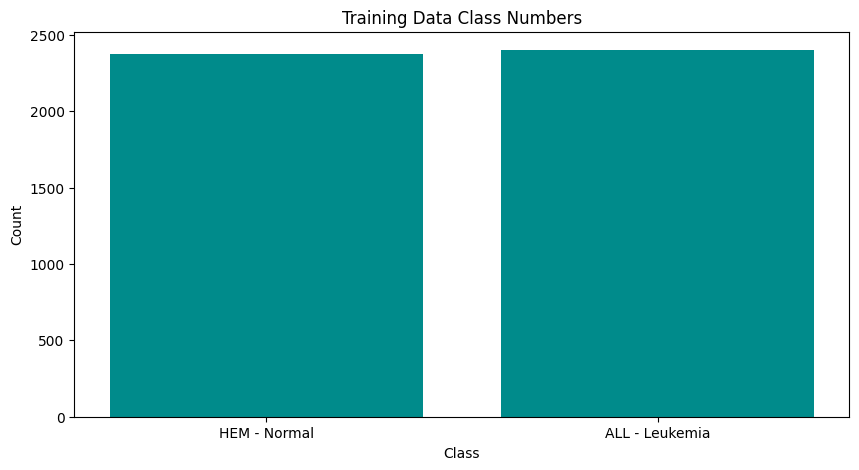

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {'HEM - Normal':num_items_hem, 'ALL - Leukemia':num_items_all}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='DARKCYAN')

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Data Class Numbers")
plt.show()

# **Prétraitement des données**

In [ ]:
import os
from PIL import Image

# Créer deux dossiers pour les images de cellules leucémiques et normales
leukemia = "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/1_Leukemia"
normal= "/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/0_Normal"

# Définir les étiquettes pour les images
leukemia_label = "all"
normal_label = "ham"

# Créer un dictionnaire pour les étiquettes
label_dict = {normal: normal_label,leukemia: leukemia_label}

# Initialiser deux listes vides pour les images et les étiquettes
images = []
labels = []

# Parcourir les dossiers d'images et ajouter des étiquettes à chaque image
for folder, label in label_dict.items():
    for filename in os.listdir(folder):
        # Ouvrir l'image avec Pillow
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        # Ajouter l'image à la liste d'images
        images.append(img)
        # Ajouter l'étiquette correspondante à la liste d'étiquettes
        labels.append(label)

# Convertir les étiquettes en un format numérique utilisable pour l'entraînement du modèle
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encoder les étiquettes en entiers
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Convertir les étiquettes encodées en une représentation one-hot encoding
labels_onehot = to_categorical(labels_encoded)

In [ ]:
labels_onehot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
labels_encoded

array([1, 1, 1, ..., 0, 0, 0])

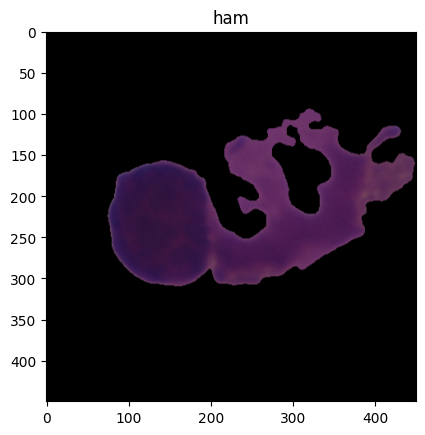

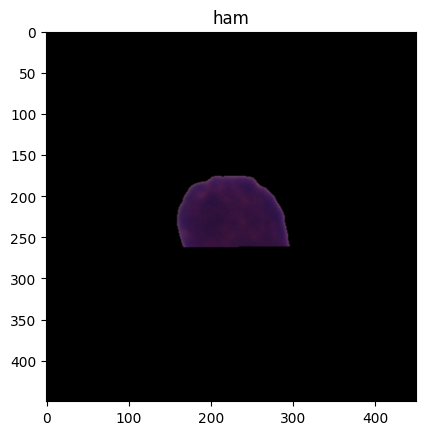

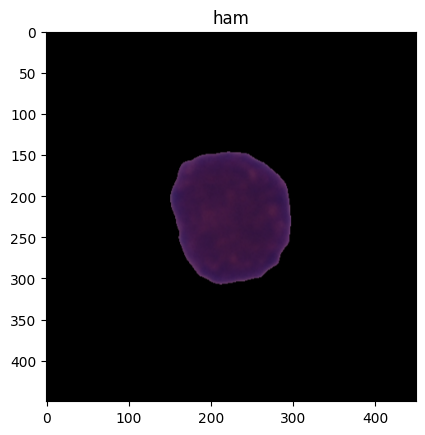

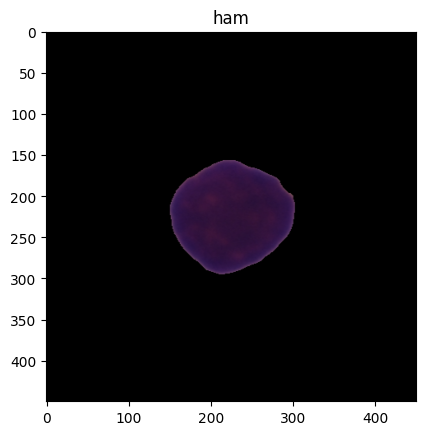

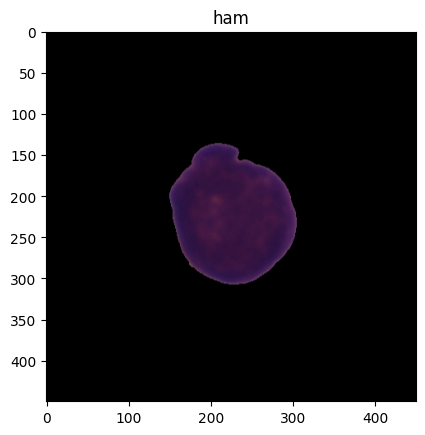

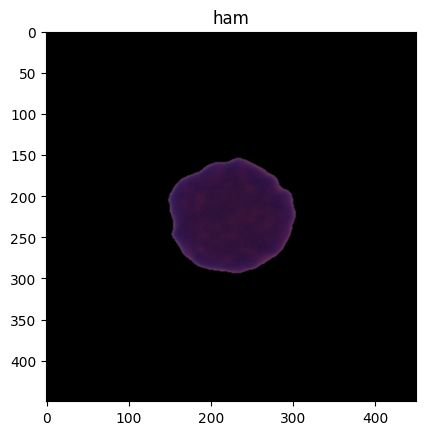

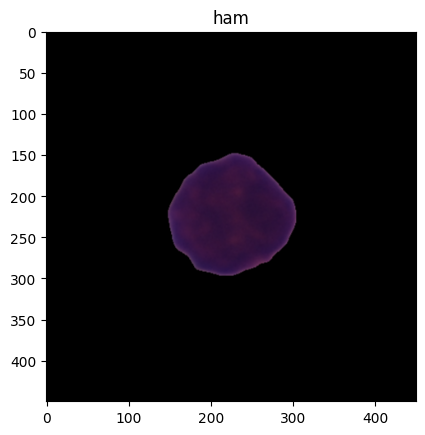

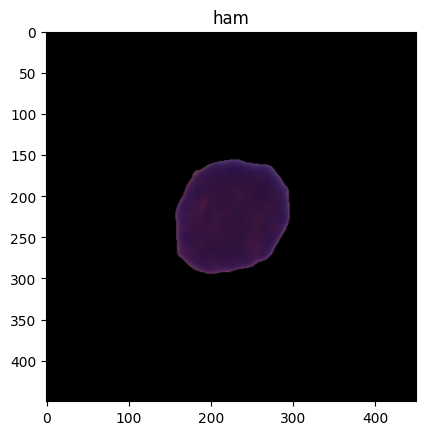

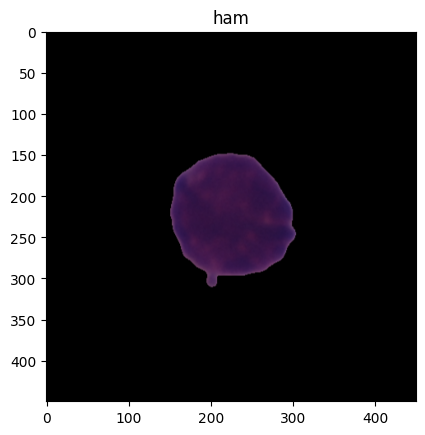

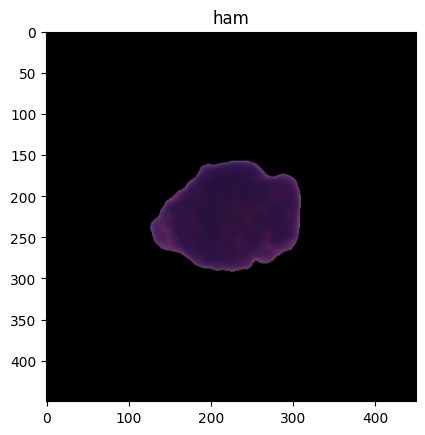

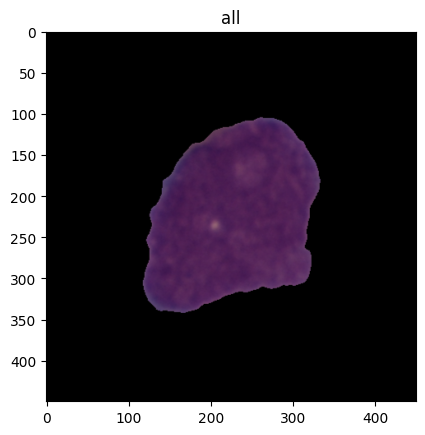

In [ ]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images = 10

# Loop over the first num_images images and their labels
for i in range(num_images):
    # Get the image and label
    img = images[i]
    label = labels[i]

    # Display the image with its label as the title
    plt.imshow(img)
    plt.title(label)
    plt.show()
img = images[-1]
label = labels[-1]

    # Display the image with its label as the title
plt.imshow(img)
plt.title(label)
plt.show()


In [ ]:
from PIL import Image

# Open the image file
image = Image.open('/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/1_Leukemia/UID_11_10_1_all.bmp')

# Get the original size (width and height)
original_width, original_height = image.size

print("Original Width:", original_width)
print("Original Height:", original_height)


Original Width: 450
Original Height: 450


In [ ]:
import os

folder_path = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/0_Normal'  # Replace with the path to your folder

# List all items (files and subfolders) in the folder
items = os.listdir(folder_path)

# Count the number of items
num_elements = len(items)

print("Number of elements in the folder:", num_elements)


Number of elements in the folder: 2963


In [ ]:
import os
import random

# Répertoire contenant les images de la classe 1 (Leukemia)
leukemia_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/0_Normal'

# Liste de fichiers (images) dans le répertoire de Leukemia
leukemia_files = os.listdir(leukemia_dir)

# Nombre cible d'images pour équilibrer avec la classe normale
target_num_images = 2963

# Si vous avez plus d'images que la cible, supprimez aléatoirement des images
if len(leukemia_files) > target_num_images:
    # Calculez le nombre d'images à supprimer
    num_images_to_delete = len(leukemia_files) - target_num_images

    # Sélectionnez de manière aléatoire les images à supprimer
    images_to_delete = random.sample(leukemia_files, num_images_to_delete)

    # Chemin complet vers le répertoire de Leukemia
    leukemia_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data/0_Normal'

    # Supprimez les images sélectionnées
    for image_name in images_to_delete:
        image_path = os.path.join(leukemia_dir, image_name)
        os.remove(image_path)

    print(f"{num_images_to_delete} images ont été supprimées pour équilibrer les classes.")
else:
    print("Le nombre d'images dans la classe Leukemia est inférieur à la cible, aucune suppression nécessaire.")



426 images ont été supprimées pour équilibrer les classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Directory path to the original BMP images
original_data_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/training_data'

# Initialize an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=original_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
)


Found 4771 images belonging to 2 classes.


In [ ]:
print("Data type of labels in the generator:", train_generator.labels.dtype)

Data type of labels in the generator: int32


Lot 1:
Images (shape): (32, 224, 224, 3)
Étiquettes (shape): (32,)


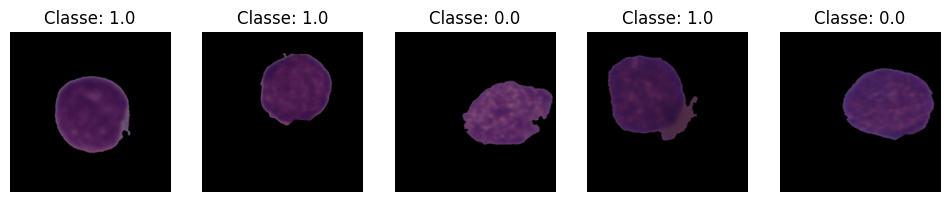

Lot 2:
Images (shape): (32, 224, 224, 3)
Étiquettes (shape): (32,)


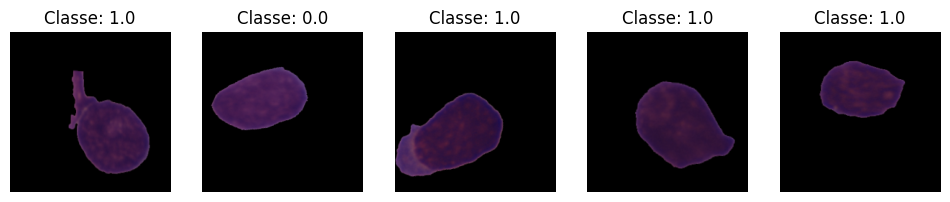

Lot 3:
Images (shape): (32, 224, 224, 3)
Étiquettes (shape): (32,)


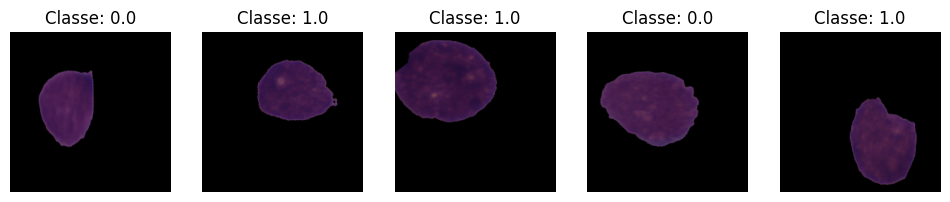

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Itérer sur le générateur pour afficher le contenu des trois premiers lots
for i, (x_batch, y_batch) in enumerate(val_data):
    # x_batch contient les images du lot actuel
    # y_batch contient les étiquettes correspondantes du lot actuel
    print(f"Lot {i + 1}:")
    print(f"Images (shape): {x_batch.shape}")
    print(f"Étiquettes (shape): {y_batch.shape}")

    # Afficher quelques images du lot
    plt.figure(figsize=(12, 6))
    for j in range(min(5, x_batch.shape[0])):  # Afficher au maximum 5 images du lot
        plt.subplot(1, 5, j + 1)
        plt.imshow(x_batch[j])
        plt.title(f"Classe: {y_batch[j]}")
        plt.axis('off')
    plt.show()

    # Arrêter l'itération après trois lots
    if i == 2:
        break


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
from PIL import Image
import numpy as np

# Directory paths
original_val_data_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data'


# Initialize an ImageDataGenerator for data augmentation and normalization
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load validation data DataFrame
val_df = pd.read_csv('/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
val_df['labels'] = val_df['labels'].astype(str)  # Convert labels column to strings


# Create a data generator for the converted PNG validation images
val_data = val_datagen.flow_from_dataframe(dataframe=val_df, directory=original_val_data_dir,
                                          x_col='new_names', y_col='labels',
                                          target_size=(224, 224),
                                          batch_size=32, class_mode='binary')


Found 1867 validated image filenames belonging to 2 classes.


In [ ]:
val_df['labels'] = val_df['labels'].astype('int32')  # Convert labels column to int32

Lot 1:
Images (shape): (64, 224, 224, 3)
Étiquettes (shape): (64,)


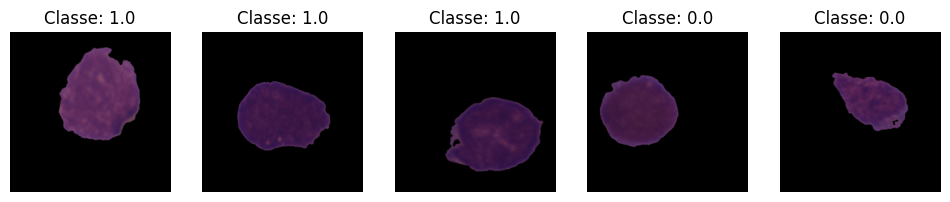

Lot 2:
Images (shape): (64, 224, 224, 3)
Étiquettes (shape): (64,)


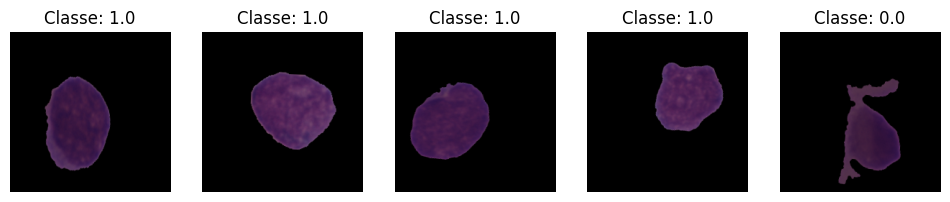

Lot 3:
Images (shape): (64, 224, 224, 3)
Étiquettes (shape): (64,)


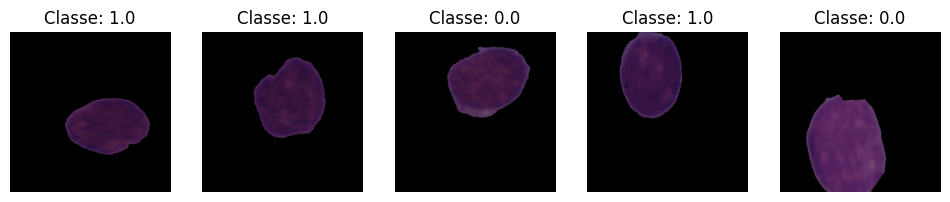

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Itérer sur le générateur pour afficher le contenu des trois premiers lots
for i, (x_batch, y_batch) in enumerate(val_data):
    # x_batch contient les images du lot actuel
    # y_batch contient les étiquettes correspondantes du lot actuel
    print(f"Lot {i + 1}:")
    print(f"Images (shape): {x_batch.shape}")
    print(f"Étiquettes (shape): {y_batch.shape}")

    # Afficher quelques images du lot
    plt.figure(figsize=(12, 6))
    for j in range(min(5, x_batch.shape[0])):  # Afficher au maximum 5 images du lot
        plt.subplot(1, 5, j + 1)
        plt.imshow(x_batch[j])
        plt.title(f"Classe: {y_batch[j]}")
        plt.axis('off')
    plt.show()

    # Arrêter l'itération après trois lots
    if i == 2:
        break


# **Conception des modéles**

In [ ]:
from scikeras.wrappers import KerasClassifier
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam, RMSprop
from keras.applications import InceptionResNetV2
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
import time



base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


start_time = time.time()
model.fit(train_generator, epochs=50, batch_size=32, validation_data=val_data)
end_time = time.time()

# Calculez et imprimez le temps d'exécution
execution_time = end_time - start_time
print("Single Configuration Execution Time: {:.2f} seconds".format(execution_time))

219055592/219055592 [==============================] - 1s 0us/step
Epoch 1/50
150/150 [==============================] - 1735s 11s/step - loss: 0.8520 - accuracy: 0.7112 - val_loss: 1.9282 - val_accuracy: 0.3990
Epoch 2/50
150/150 [==============================] - 81s 540ms/step - loss: 0.6324 - accuracy: 0.8262 - val_loss: 1.0684 - val_accuracy: 0.6117
Epoch 3/50
150/150 [==============================] - 80s 536ms/step - loss: 0.5541 - accuracy: 0.8550 - val_loss: 2.1643 - val_accuracy: 0.5469
Epoch 4/50
150/150 [==============================] - 79s 529ms/step - loss: 0.4697 - accuracy: 0.8751 - val_loss: 1.2591 - val_accuracy: 0.6743
Epoch 5/50
150/150 [==============================] - 79s 527ms/step - loss: 0.4191 - accuracy: 0.8916 - val_loss: 1.5385 - val_accuracy: 0.7177
Epoch 6/50
150/150 [==============================] - 80s 536ms/step - loss: 0.3797 - accuracy: 0.8973 - val_loss: 1.5779 - val_accuracy: 0.7081
Epoch 7/50
150/150 [==============================] - 81s 537ms

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Create InceptionResNetV2 base model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for binary classification
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint = ModelCheckpoint('InceptionResNetV2.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history = model.fit(train_generator, epochs=50, batch_size=32, validation_data=val_data, callbacks=[early_stopping, model_checkpoint])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 38400)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4915328   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 59252193 (226.03 MB)
Trainable params: 59191649 (225.80 MB)
Non-trainable params: 60544 (236.50 KB)
______

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 595s 3s/step - loss: 0.5455 - accuracy: 0.7351 - val_loss: 0.6469 - val_accuracy: 0.6529
Epoch 2/50
150/150 [==============================] - 79s 526ms/step - loss: 0.3925 - accuracy: 0.8296 - val_loss: 0.8054 - val_accuracy: 0.6149
Epoch 3/50
150/150 [==============================] - 79s 528ms/step - loss: 0.3304 - accuracy: 0.8610 - val_loss: 1.0473 - val_accuracy: 0.6599
Epoch 4/50
150/150 [==============================] - 81s 539ms/step - loss: 0.2866 - accuracy: 0.8885 - val_loss: 0.6592 - val_accuracy: 0.7258
Epoch 5/50
150/150 [==============================] - 82s 546ms/step - loss: 0.2585 - accuracy: 0.8975 - val_loss: 0.6025 - val_accuracy: 0.7424
Epoch 6/50
150/150 [==============================] - 79s 526ms/step - loss: 0.2368 - accuracy: 0.9071 - val_loss: 0.6933 - val_accuracy: 0.5319
Epoch 7/50
150/150 [==============================] - 79s 524ms/step - loss: 0.2045 - accuracy: 0.9195 - val_loss: 0.8527 - val_accuracy: 0.683

# **Modèle personnel**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
modelp = Sequential()

# Convolutional layers
modelp.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
modelp.add(MaxPooling2D((2, 2)))
modelp.add(Conv2D(64, (3, 3), activation='relu'))
modelp.add(MaxPooling2D((2, 2)))
modelp.add(Conv2D(128, (3, 3), activation='relu'))
modelp.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
modelp.add(Flatten())

# Fully connected layers
modelp.add(Dense(128, activation='relu'))
modelp.add(Dropout(0.5))  # Dropout for regularization
modelp.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
modelp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
modelp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint = ModelCheckpoint('modelp.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history = modelp.fit(train_generator, epochs=20, batch_size=32, validation_data=val_data, callbacks=[early_stopping, model_checkpoint])

modelp.save('leukemia_detection_modelp.h5')

Epoch 1/20
150/150 [==============================] - ETA: 0s - loss: 0.6221 - accuracy: 0.6623

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 222s 1s/step - loss: 0.6221 - accuracy: 0.6623 - val_loss: 0.7091 - val_accuracy: 0.5538
Epoch 2/20
150/150 [==============================] - 173s 1s/step - loss: 0.5926 - accuracy: 0.6990 - val_loss: 0.6778 - val_accuracy: 0.6476
Epoch 3/20
150/150 [==============================] - 168s 1s/step - loss: 0.5677 - accuracy: 0.7191 - val_loss: 0.7533 - val_accuracy: 0.5431
Epoch 4/20
150/150 [==============================] - 169s 1s/step - loss: 0.5713 - accuracy: 0.7076 - val_loss: 0.6624 - val_accuracy: 0.6433
Epoch 5/20
150/150 [==============================] - 217s 1s/step - loss: 0.5578 - accuracy: 0.7212 - val_loss: 0.6659 - val_accuracy: 0.6417
Epoch 6/20
150/150 [==============================] - 172s 1s/step - loss: 0.5336 - accuracy: 0.7443 - val_loss: 0.6635 - val_accuracy: 0.6583
Epoch 7/20
150/150 [==============================] - 170s 1s/step - loss: 0.5075 - accuracy: 0.7634 - val_loss: 0.8173 - val_accuracy: 0.5554
Epoch 8/20

# **ResNet50 model**

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load the pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a custom top (classification) layer
model_ResNet50 = Sequential()
model_ResNet50.add(base_model)
model_ResNet50.add(Flatten())
model_ResNet50.add(Dense(128, activation='relu'))
model_ResNet50.add(Dropout(0.6))
model_ResNet50.add(Dense(1, activation='sigmoid'))


# Compile the model
model_ResNet50.compile(optimizer=Adam(learning_rate=1e-05), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model_ResNet50.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               12845184  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36433025 (138.98 MB)
Trainable params: 36379905 (138.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint = ModelCheckpoint('RestNet50_2.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history_ResNet50 = model_ResNet50.fit(train_generator, epochs=50, batch_size=64, validation_data=val_data, callbacks=[early_stopping, model_checkpoint])


Epoch 1/50
150/150 [==============================] - ETA: 0s - loss: 0.7736 - accuracy: 0.6653

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 851s 5s/step - loss: 0.7736 - accuracy: 0.6653 - val_loss: 0.9743 - val_accuracy: 0.3471
Epoch 2/50
150/150 [==============================] - 94s 627ms/step - loss: 0.5328 - accuracy: 0.7409 - val_loss: 0.7465 - val_accuracy: 0.6529
Epoch 3/50
150/150 [==============================] - 93s 621ms/step - loss: 0.4797 - accuracy: 0.7770 - val_loss: 0.7339 - val_accuracy: 0.6529
Epoch 4/50
150/150 [==============================] - 91s 609ms/step - loss: 0.4439 - accuracy: 0.7979 - val_loss: 0.8548 - val_accuracy: 0.6572
Epoch 5/50
150/150 [==============================] - 89s 593ms/step - loss: 0.4237 - accuracy: 0.8080 - val_loss: 0.9435 - val_accuracy: 0.6529
Epoch 6/50
150/150 [==============================] - 87s 579ms/step - loss: 0.3883 - accuracy: 0.8319 - val_loss: 0.9941 - val_accuracy: 0.6529
Epoch 7/50
150/150 [==============================] - 88s 586ms/step - loss: 0.3531 - accuracy: 0.8474 - val_loss: 0.7111 - val_accuracy: 0.671

# **VGG16 model**

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load the pretrained ResNet50 model
VGG16_2 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a custom top (classification) layer
model_VGG16_2 = Sequential()
model_VGG16_2.add(VGG16_2)
model_VGG16_2.add(Flatten())
model_VGG16_2.add(Dense(128, activation='relu'))
model_VGG16_2.add(Dropout(0.5))
model_VGG16_2.add(Dense(1, activation='sigmoid'))

# Compile the model
model_VGG16_2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model_VGG16_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 17926209 (68.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint = ModelCheckpoint('VGG16_2.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history_VGG16_2 = model_VGG16_2.fit(train_generator, epochs=20, batch_size=32, validation_data=val_data, callbacks=[early_stopping, model_checkpoint])



Epoch 1/20
150/150 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.6814 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 3185s 21s/step - loss: 0.6053 - accuracy: 0.6814 - val_loss: 0.6662 - val_accuracy: 0.6272
Epoch 2/20
150/150 [==============================] - 2416s 16s/step - loss: 0.5604 - accuracy: 0.7202 - val_loss: 0.7108 - val_accuracy: 0.6149
Epoch 3/20
150/150 [==============================] - 2450s 16s/step - loss: 0.5452 - accuracy: 0.7361 - val_loss: 0.6962 - val_accuracy: 0.6326
Epoch 4/20
150/150 [==============================] - 2394s 16s/step - loss: 0.5130 - accuracy: 0.7581 - val_loss: 0.7153 - val_accuracy: 0.5881
Epoch 5/20
150/150 [==============================] - 2399s 16s/step - loss: 0.4620 - accuracy: 0.7870 - val_loss: 0.6667 - val_accuracy: 0.6781


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_data_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/test_split'

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0  # Normalize pixel values to [0, 1]
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Specify the target image size
    batch_size=32,
    class_mode='binary'  # Change this based on your task (e.g., 'categorical' for multiclass)
)

Found 1192 images belonging to 2 classes.


<ipython-input-86-bcb18550ec10>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator)


Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       592
           1       0.50      0.64      0.56       600

    accuracy                           0.50      1192
   macro avg       0.50      0.50      0.49      1192
weighted avg       0.50      0.50      0.49      1192



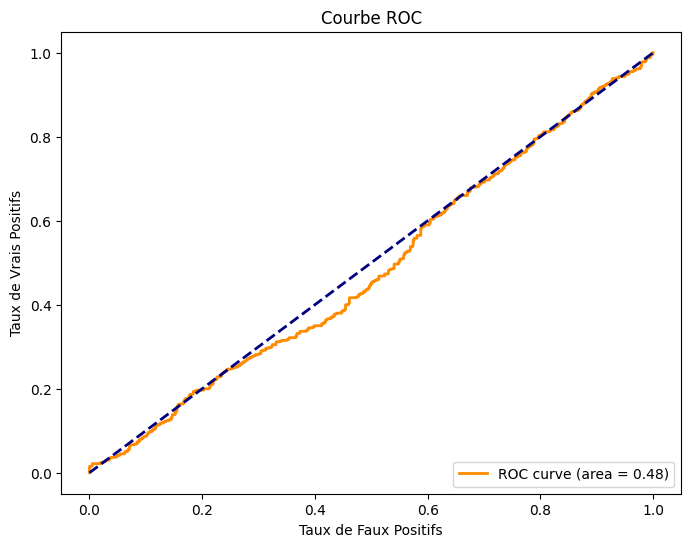

In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report, roc_curve, auc

# Prédiction sur l'ensemble de test

model = load_model('/content/RestNet50_2.h5')
test_predictions = model.predict_generator(test_generator)
test_labels = test_generator.classes  # Obtenez les vraies étiquettes de l'ensemble de test

# Convertissez les probabilités en classes prédites (0 ou 1)
test_pred_classes = (test_predictions > 0.5).astype(int)

# Rapport de classification pour l'ensemble de test
print("Rapport de classification sur l'ensemble de test :")
print(classification_report(test_labels, test_pred_classes))

# Courbes ROC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc_score = auc(fpr, tpr)

# Afficher la courbe ROC et calculer l'AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


# **Modèle personnel**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
def leukemia_detection_model(input_shape=(224, 224, 3)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv2', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv5', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv6', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv7', activation='relu',  kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))


    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))

    optimizer = Adam(0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model= leukemia_detection_model(input_shape=(224, 224, 3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_14 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2 (Conv2D)              (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_15 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 32)     

In [ ]:
hist = model.fit(train_generator,batch_size=128, epochs=200, validation_data=val_data)

Epoch 1/200
150/150 [==============================] - 1498s 10s/step - loss: 0.8883 - accuracy: 0.5030 - val_loss: 1.3033 - val_accuracy: 0.6529
Epoch 2/200
150/150 [==============================] - 413s 3s/step - loss: 0.6843 - accuracy: 0.5030 - val_loss: 1.3420 - val_accuracy: 0.6529
Epoch 3/200
150/150 [==============================] - 422s 3s/step - loss: 0.6710 - accuracy: 0.5030 - val_loss: 0.7178 - val_accuracy: 0.6529
Epoch 4/200
150/150 [==============================] - 431s 3s/step - loss: 0.6657 - accuracy: 0.5030 - val_loss: 0.6756 - val_accuracy: 0.6529
Epoch 5/200
150/150 [==============================] - 432s 3s/step - loss: 0.6515 - accuracy: 0.5030 - val_loss: 0.8161 - val_accuracy: 0.6529
Epoch 6/200
150/150 [==============================] - 437s 3s/step - loss: 0.6477 - accuracy: 0.5030 - val_loss: 0.8267 - val_accuracy: 0.6529
Epoch 7/200
150/150 [==============================] - 442s 3s/step - loss: 0.6430 - accuracy: 0.5030 - val_loss: 0.8421 - val_accurac

UnknownError: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_data_dir = '/content/drive/MyDrive/Leukemia_detection/C-NMC_Leukemia/test_split'

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0  # Normalize pixel values to [0, 1]
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Specify the target image size
    batch_size=32,
    class_mode='binary'  # Change this based on your task (e.g., 'categorical' for multiclass)
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 1192 images belonging to 2 classes.
38/38 [==============================] - 804s 22s/step - loss: 0.4153 - accuracy: 0.8154
Test Accuracy: 81.54%


# **InceptionV3 model**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load the pretrained VGG16 model
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a custom top (classification) layer
model_Inception = Sequential()
model_Inception.add(inception)
model_Inception.add(Flatten())
model_Inception.add(Dense(128, activation='relu'))
model_Inception.add(Dropout(0.5))
model_Inception.add(Dense(1, activation='sigmoid'))

# Compile the model
model_Inception.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_Inception.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               6553728   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28356641 (108.17 MB)
Trainable params: 28322209 (108.04 MB)
Non-trainable params: 34432 (134.50 KB)
_______

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Define the ModelCheckpoint callback to save the best model weights
model_checkpoint = ModelCheckpoint('Inception.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history_Inception = model_Inception.fit(train_generator, epochs=10, batch_size=32, validation_data=val_data, callbacks=[early_stopping, model_checkpoint])

#model2.save('leukemia_detection_model_VGG16.h5')

Epoch 1/10
150/150 [==============================] - ETA: 0s - loss: 0.5499 - accuracy: 0.7363

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 676s 4s/step - loss: 0.5499 - accuracy: 0.7363 - val_loss: 0.6566 - val_accuracy: 0.6636
Epoch 2/10
150/150 [==============================] - 660s 4s/step - loss: 0.3763 - accuracy: 0.8348 - val_loss: 0.8940 - val_accuracy: 0.6615
Epoch 3/10
150/150 [==============================] - 654s 4s/step - loss: 0.3068 - accuracy: 0.8786 - val_loss: 1.0088 - val_accuracy: 0.6176
Epoch 4/10
150/150 [==============================] - 658s 4s/step - loss: 0.2945 - accuracy: 0.8824 - val_loss: 0.6197 - val_accuracy: 0.7151
Epoch 5/10
150/150 [==============================] - 630s 4s/step - loss: 0.2514 - accuracy: 0.9078 - val_loss: 1.3279 - val_accuracy: 0.6074
Epoch 6/10
150/150 [==============================] - 632s 4s/step - loss: 0.2354 - accuracy: 0.9092 - val_loss: 0.8293 - val_accuracy: 0.6776
Epoch 7/10
150/150 [==============================] - 637s 4s/step - loss: 0.2152 - accuracy: 0.9187 - val_loss: 0.7209 - val_accuracy: 0.7124
Epoch 8/10